In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from scipy.io import readsav

import bagpipes as pipes

In [2]:
"""The format of the spectrum returned by load_data should be a 2D array with three columns: 
wavelengths in Angstroms, fluxes in erg/s/cm^2/A and flux errors in the same units 
(can be changed to microJansksys with 
the spec_units keyword argument). These will be stored in galaxy.spectrum.
"""

def load_malin2(ID):
    if not hasattr(load_malin2, 'f1'):
        load_malin2.f1 = readsav('Malin2binned.sav')
    # Do some stuff to load up data for the object with the correct ID number
    ID = int(ID)
    rough_spec = load_malin2.f1['binned_spec'][ID,:] + 0 
    rough_err = load_malin2.f1['binned_err'][ID,:] + 0
    # Rough cut to chop off bad pixels
    
    bp = np.where((rough_spec < 0) | (rough_spec > 4))[0]
    
    rough_spec[bp] = 0
    rough_err[bp] = 1e6
    wave = np.exp(load_malin2.f1['wave'])
    bp = np.where((wave > 5565) & (wave < 5590))
    
    rough_spec[bp] = 0
    rough_err[bp] = 1e6
    
    bp = np.where(wave > 5780)
    rough_spec[bp] = 0
    rough_err[bp] = 1e6
    
    if ID == 5:
        bp = np.where(wave > 5770)
        rough_spec[bp] = 0
        rough_err[bp] = 1e6
        
        bp = np.where(wave < 3570)
        rough_spec[bp] = 0
        rough_err[bp] = 1e6
    
    rough_err[0:5] = 1e6
    
    good = np.where(rough_err < 1e6)
    
    spectrum = np.vstack([np.exp(load_malin2.f1['wave'])[good], rough_spec[good]*1e-18, rough_err[good]*1e-18])
    

    return spectrum.T


In [3]:
def load_ugc(ID):
    if not hasattr(load_ugc, 'f1'):
        load_ugc.f1 = readsav('UGC06614binned.sav')
    # Do some stuff to load up data for the object with the correct ID number
    ID = int(ID)
    rough_spec = load_ugc.f1['binned_spec'][ID, :] + 0 
    rough_err = load_ugc.f1['binned_err'][ID, :] + 0
    # Rough cut to chop off bad pixels
    bp = np.where((rough_spec < 0) | (rough_spec > 4))[0]
    
    rough_spec[bp] = 0
    rough_err[bp] = 1e6
    
    wave = np.exp(load_ugc.f1['wave'])
    good = np.where((3900 < wave) & (wave < 5500) & (rough_err < 1e6) & (rough_spec > 0))[0]
    
    spectrum = np.vstack([np.exp(load_ugc.f1['wave'])[good], rough_spec[good]*1e-18, rough_err[good]*1e-18])
    
    return spectrum.T

In [5]:
f1 = readsav('Malin2binned.sav')
f1['binned_spec'].shape

(6, 1024)

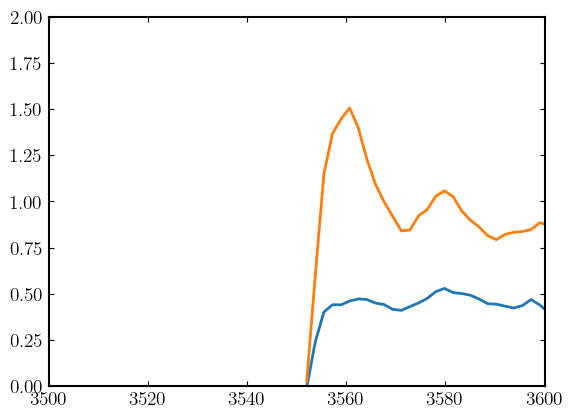

In [14]:
plt.plot(np.exp(f1['wave']), f1['binned_spec'][0,:])
plt.ylim([0,2])
plt.xlim([3500, 3600])
plt.plot(np.exp(f1['wave']), f1['binned_spec'][5,:])


In [6]:
f1['binned_spec'][0]

array([-6.78388355e-03,  3.65459055e-01,  4.78690952e-01, ...,
       -2.75527169e+18, -2.75527169e+18, -2.62945924e+18])

In [7]:
# ok, how do I make this a bagpies object?
ack = load_malin2(0)
ack.shape

(987, 3)

(6, 1024)

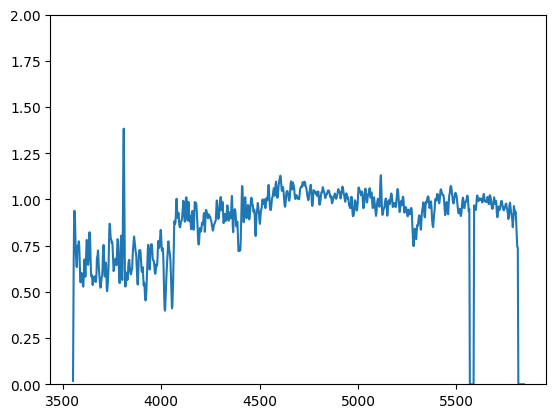

In [7]:
f1 = readsav('UGC06614binned.sav')
plt.plot(np.exp(f1['wave']), f1['binned_spec'][3,:])
plt.ylim([0,2])
f1['binned_spec'].shape

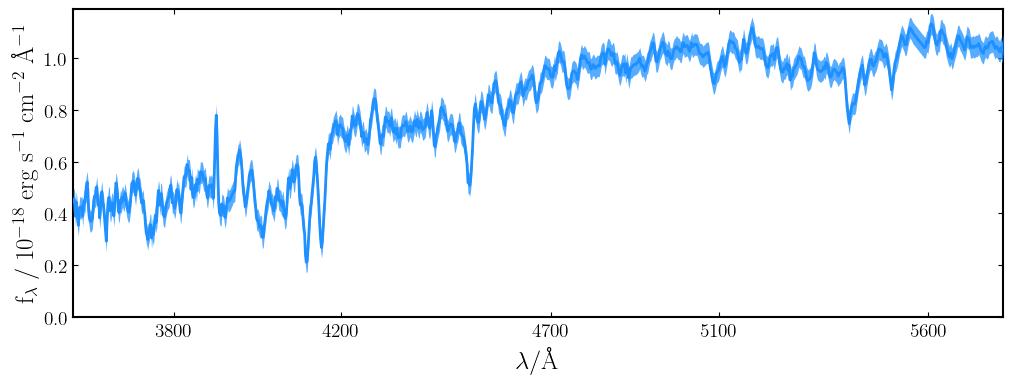

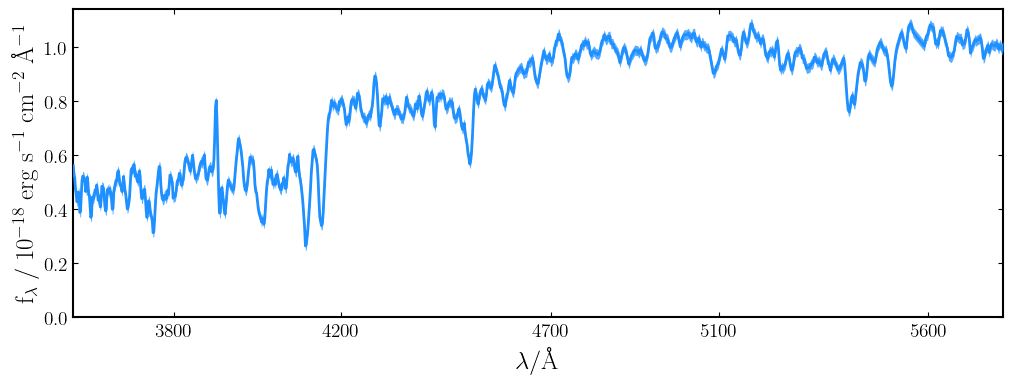

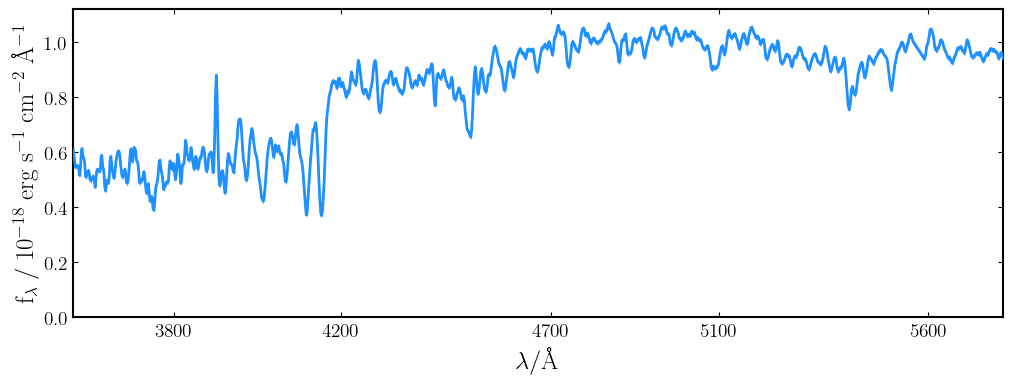

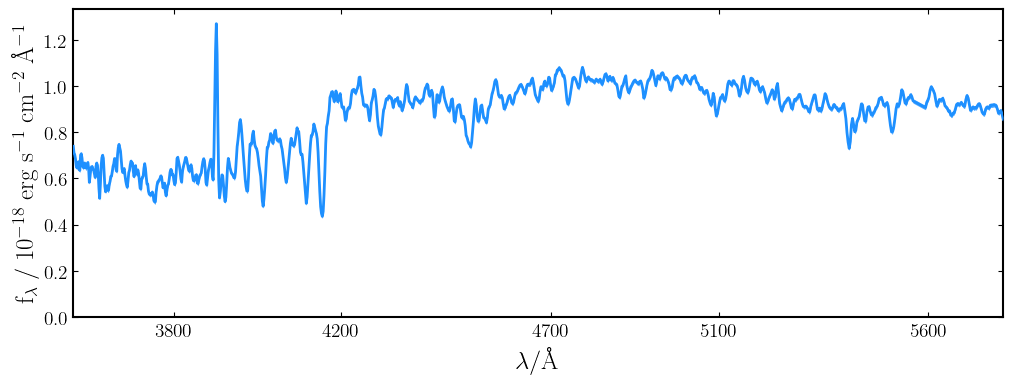

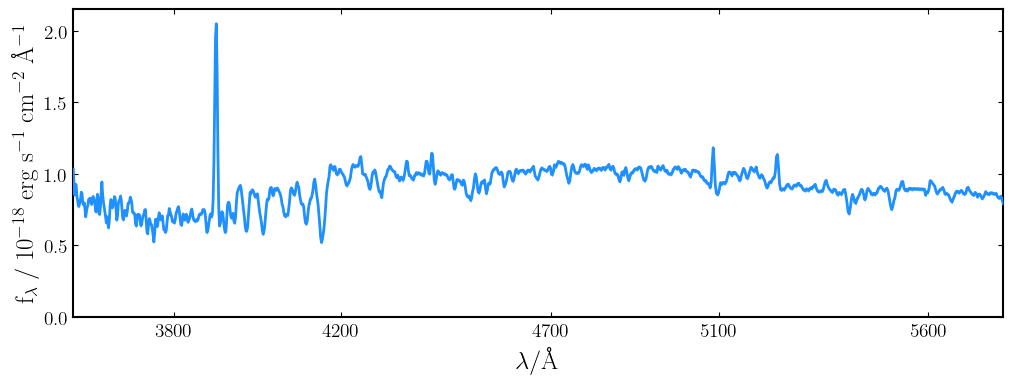

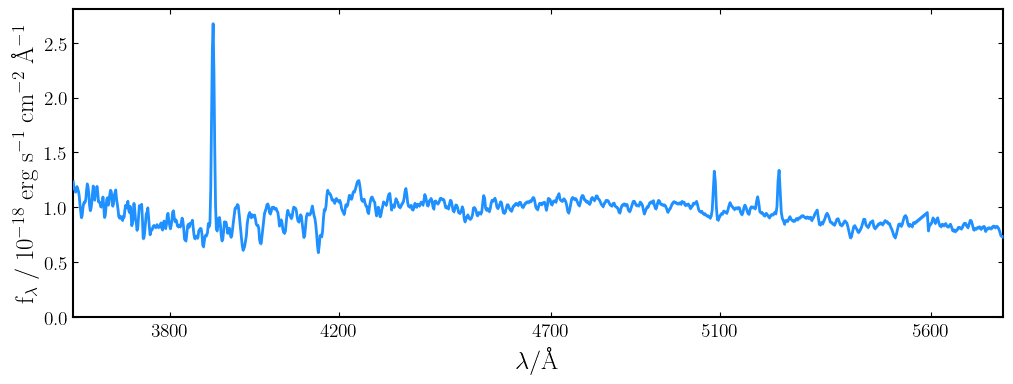

In [18]:
# ok, we have a spectra loaded up. Not too shabby. 
for ID_number in range(6):
    galaxy = pipes.galaxy(ID_number, load_malin2, filt_list=[], photometry_exists=False)
    fig, ax = galaxy.plot()


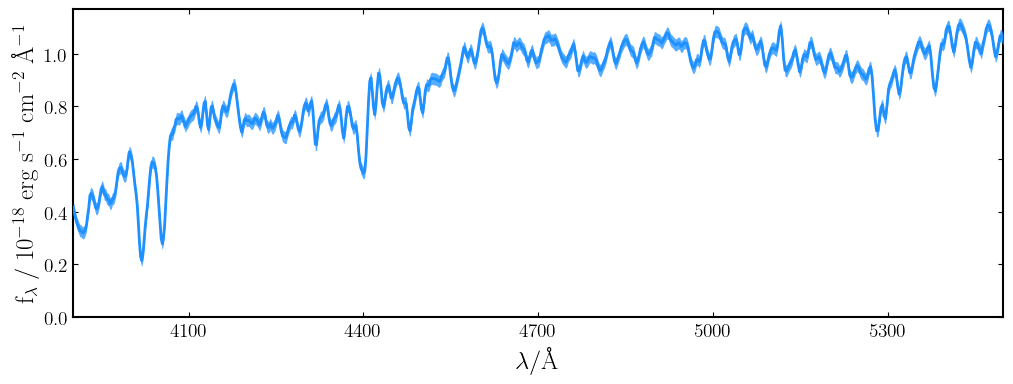

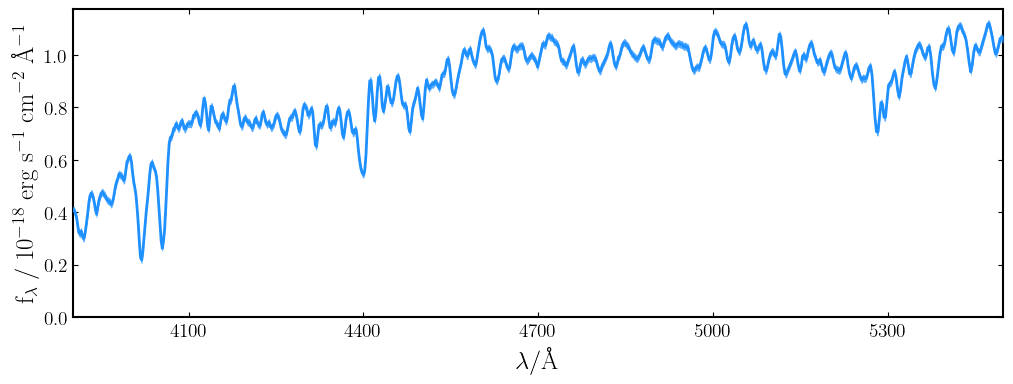

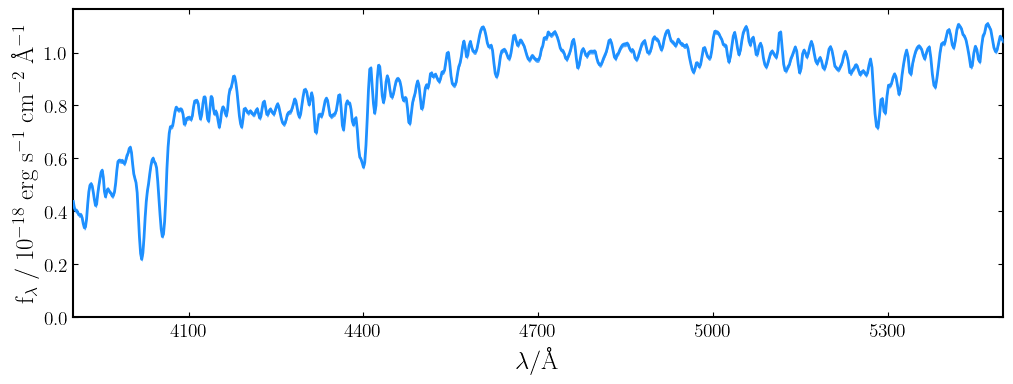

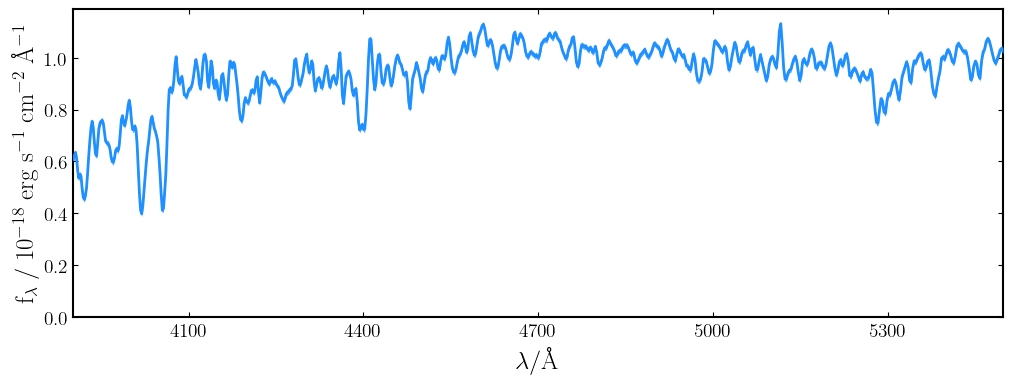

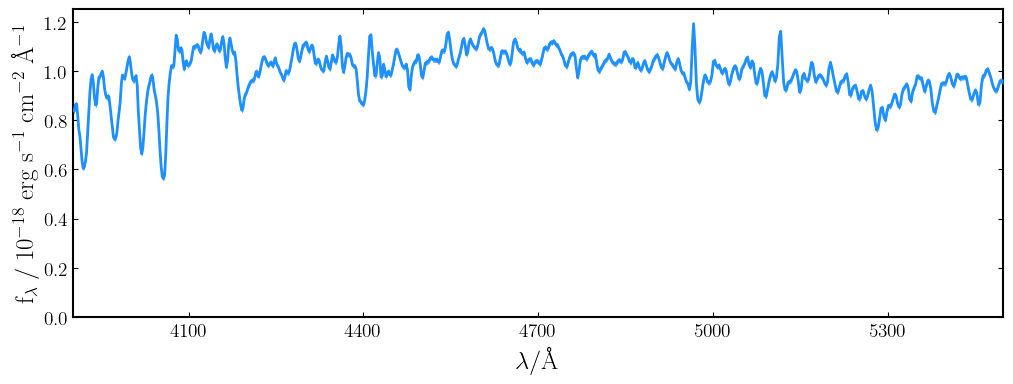

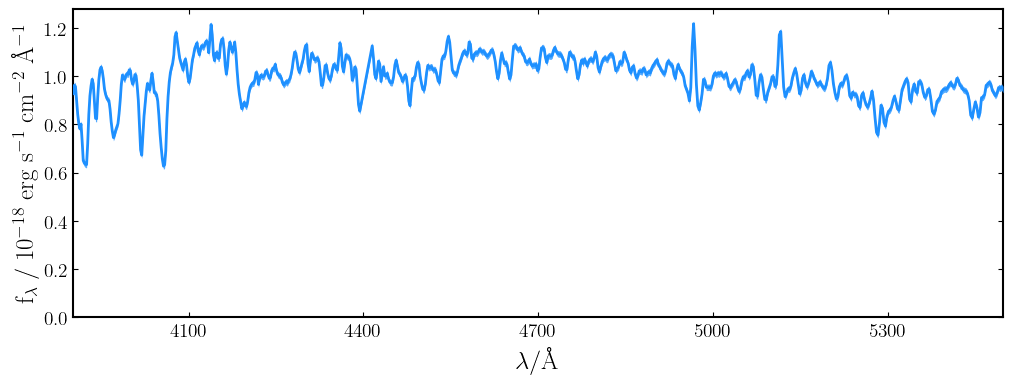

In [24]:
# ok, we have a spectra loaded up. Not too shabby. 
for ID_number in range(6):
    galaxy = pipes.galaxy(ID_number, load_ugc, filt_list=[], photometry_exists=False)
    fig, ax = galaxy.plot()


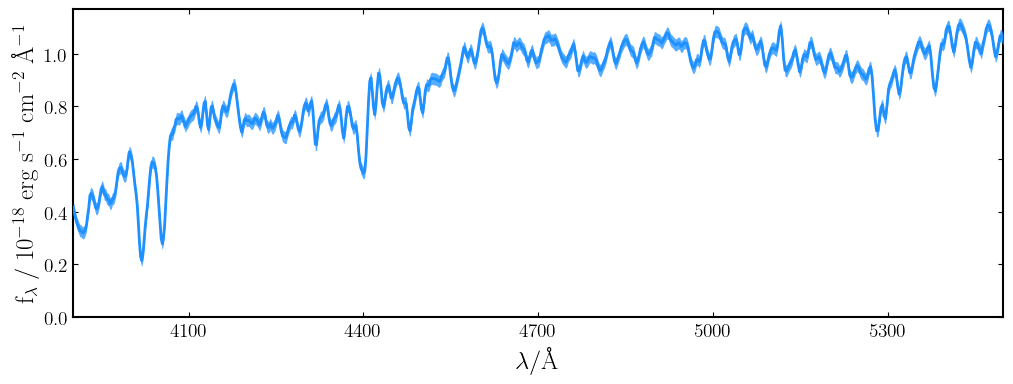

In [23]:
# ok, we have a spectra loaded up. Not too shabby. 
ID_number = 0

galaxy = pipes.galaxy(ID_number, load_ugc, filt_list=[], photometry_exists=False)

fig, ax = galaxy.plot()


In [12]:


exp = {}                          # Tau model star formation history component
exp["age"] = 3.                   # Gyr
exp["tau"] = 0.75                 # Gyr
exp["massformed"] = 9.            # log_10(M*/M_solar)
exp["metallicity"] = 0.5          # Z/Z_oldsolar

dust = {}                         # Dust component
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = 0.2                  # magnitudes

model_components = {}                   # The model components dictionary
model_components["redshift"] = 1.0      # Observed redshift  
model_components["exponential"] = exp   
model_components["dust"] = dust

In [13]:
goodss_filt_list = np.loadtxt("filters/goodss_filt_list.txt", dtype="str")

In [14]:
model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list)

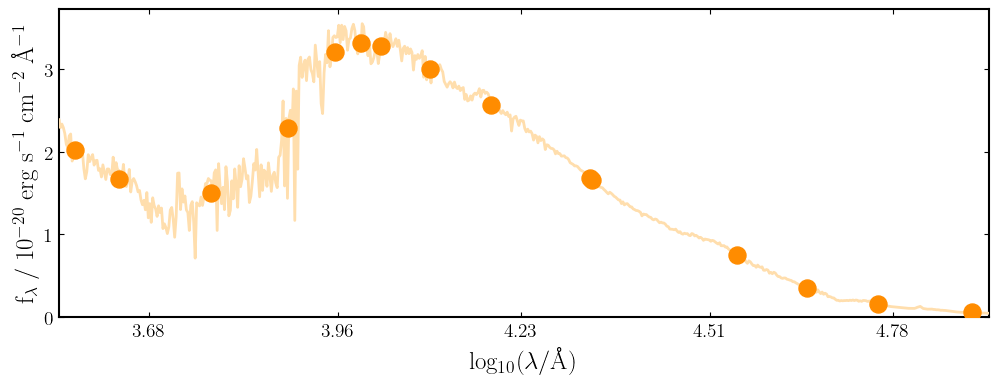

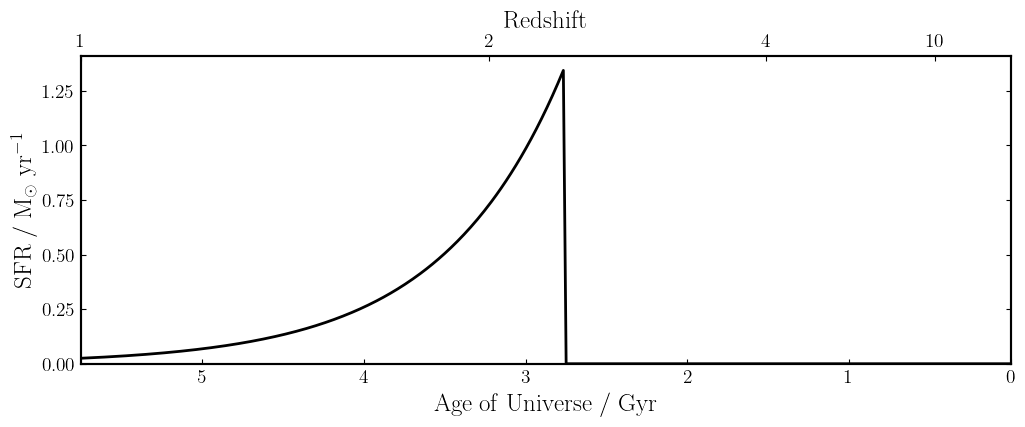

In [15]:
fig = model.plot()
fig = model.sfh.plot()


In [14]:
dblplaw = {}                        
dblplaw["tau"] = (0., 15.)            
dblplaw["alpha"] = (0.01, 1000.)
dblplaw["beta"] = (0.01, 1000.)
dblplaw["alpha_prior"] = "log_10"
dblplaw["beta_prior"] = "log_10"
dblplaw["massformed"] = (1., 15.)
dblplaw["metallicity"] = (0.1, 2.)
dblplaw["metallicity_prior"] = "log_10"

nebular = {}
nebular["logU"] = -3.

dust = {}
dust["type"] = "CF00"
dust["eta"] = 2.
dust["Av"] = (0., 2.0)
dust["n"] = (0.3, 2.5)
dust["n_prior"] = "Gaussian"
dust["n_prior_mu"] = 0.7
dust["n_prior_sigma"] = 0.3

fit_instructions = {}
fit_instructions["redshift"] = (0.0, 0.1)
fit_instructions["t_bc"] = 0.01
#fit_instructions["redshift_prior"] = "Gaussian"
#fit_instructions["redshift_prior_mu"] = 0.9
#fit_instructions["redshift_prior_sigma"] = 0.05
fit_instructions["dblplaw"] = dblplaw 
fit_instructions["nebular"] = nebular
fit_instructions["dust"] = dust

fit_instructions["veldisp"] = (1., 2000.)   #km/s
fit_instructions["veldisp_prior"] = "log_10"

calib = {}
calib["type"] = "polynomial_bayesian"

calib["0"] = (0.5, 1.5) # Zero order is centred on 1, at which point there is no change to the spectrum.
calib["0_prior"] = "Gaussian"
calib["0_prior_mu"] = 1.0
calib["0_prior_sigma"] = 0.25

calib["1"] = (-0.5, 0.5) # Subsequent orders are centred on zero.
calib["1_prior"] = "Gaussian"
calib["1_prior_mu"] = 0.
calib["1_prior_sigma"] = 0.25

calib["2"] = (-0.5, 0.5)
calib["2_prior"] = "Gaussian"
calib["2_prior_mu"] = 0.
calib["2_prior_sigma"] = 0.25

fit_instructions["calib"] = calib

# XXX--does this actually get passed in?
mlpoly = {}
mlpoly["type"] = "polynomial_max_like"
mlpoly["order"] = 2

noise = {}
noise["type"] = "white_scaled"
noise["scaling"] = (1., 10.)
noise["scaling_prior"] = "log_10"
fit_instructions["noise"] = noise

In [15]:
ID_number = 0
galaxy = pipes.galaxy(ID_number, load_malin2, photometry_exists=False)
fit = pipes.fit(galaxy, fit_instructions, run="malin_test_%i" % ID_number)

#galaxy = pipes.galaxy(ID_number, load_ugc, photometry_exists=False)
#fit = pipes.fit(galaxy, fit_instructions, run="ugc_test_%i" % ID_number)

In [16]:
fit.fit(verbose=True)


Bagpipes: fitting object 0

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =   13
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.986842
Replacements:                                450
Total Samples:                               456
Nested Sampling ln(Z):            **************
Acceptance Rate:                        0.974659
Replacements:                                500
Total Samples:                               513
Nested Sampling ln(Z):            **************
Acceptance Rate:                        0.948276
Replacements:                                550
Total Samples:                               580
Nested Sampling ln(Z):            **************

Acceptance Rate:                        0.386985
Replacements:                               2450
Total Samples:                              6331
Nested Sampling ln(Z):              -2782.665127
Acceptance Rate:                        0.384379
Replacements:                               2500
Total Samples:                              6504
Nested Sampling ln(Z):              -2699.373070
Acceptance Rate:                        0.379013
Replacements:                               2550
Total Samples:                              6728
Nested Sampling ln(Z):              -2597.259610
Acceptance Rate:                        0.374910
Replacements:                               2600
Total Samples:                              6935
Nested Sampling ln(Z):              -2532.005356
Acceptance Rate:                        0.371773
Replacements:                               2650
Total Samples:                              7128
Nested Sampling ln(Z):              -2462.648604
Acceptance Rate:    

Acceptance Rate:                        0.209157
Replacements:                               4550
Total Samples:                             21754
Nested Sampling ln(Z):              -1511.426869
Acceptance Rate:                        0.205183
Replacements:                               4600
Total Samples:                             22419
Nested Sampling ln(Z):              -1493.830862
Acceptance Rate:                        0.202042
Replacements:                               4650
Total Samples:                             23015
Nested Sampling ln(Z):              -1479.131827
Acceptance Rate:                        0.199601
Replacements:                               4700
Total Samples:                             23547
Nested Sampling ln(Z):              -1467.085007
Acceptance Rate:                        0.196908
Replacements:                               4750
Total Samples:                             24123
Nested Sampling ln(Z):              -1454.272370
Acceptance Rate:    

Acceptance Rate:                        0.144452
Replacements:                               6650
Total Samples:                             46036
Nested Sampling ln(Z):               -895.979284
Acceptance Rate:                        0.142866
Replacements:                               6700
Total Samples:                             46897
Nested Sampling ln(Z):               -884.642291
Acceptance Rate:                        0.142261
Replacements:                               6750
Total Samples:                             47448
Nested Sampling ln(Z):               -871.427747
Acceptance Rate:                        0.141355
Replacements:                               6800
Total Samples:                             48106
Nested Sampling ln(Z):               -858.072008
Acceptance Rate:                        0.140045
Replacements:                               6850
Total Samples:                             48913
Nested Sampling ln(Z):               -843.829262
Acceptance Rate:    

Acceptance Rate:                        0.105003
Replacements:                               8750
Total Samples:                             83331
Nested Sampling ln(Z):               -496.611744
Acceptance Rate:                        0.104073
Replacements:                               8800
Total Samples:                             84556
Nested Sampling ln(Z):               -489.395621
Acceptance Rate:                        0.102822
Replacements:                               8850
Total Samples:                             86071
Nested Sampling ln(Z):               -484.486606
Acceptance Rate:                        0.102001
Replacements:                               8900
Total Samples:                             87254
Nested Sampling ln(Z):               -479.502844
Acceptance Rate:                        0.101079
Replacements:                               8950
Total Samples:                             88545
Nested Sampling ln(Z):               -474.381795
Acceptance Rate:    


 MultiNest Warning!
 Parameter           11  of mode            1  is converging towards the edge of the prior.
Acceptance Rate:                        0.068694
Replacements:                              10500
Total Samples:                            152851
Nested Sampling ln(Z):               -369.597713
Acceptance Rate:                        0.067321
Replacements:                              10550
Total Samples:                            156712
Nested Sampling ln(Z):               -367.414609

 MultiNest Warning!
 Parameter           11  of mode            1  is converging towards the edge of the prior.
Acceptance Rate:                        0.066227
Replacements:                              10600
Total Samples:                            160055
Nested Sampling ln(Z):               -365.451038
Acceptance Rate:                        0.065411
Replacements:                              10650
Total Samples:                            162816
Nested Sampling ln(Z):               -3

Acceptance Rate:                        0.053116
Replacements:                              12150
Total Samples:                            228746
Nested Sampling ln(Z):               -282.343280

 MultiNest Warning!
 Parameter           11  of mode            1  is converging towards the edge of the prior.
Acceptance Rate:                        0.052870
Replacements:                              12200
Total Samples:                            230756
Nested Sampling ln(Z):               -280.838195
Acceptance Rate:                        0.052367
Replacements:                              12250
Total Samples:                            233925
Nested Sampling ln(Z):               -279.385914

 MultiNest Warning!
 Parameter           11  of mode            1  is converging towards the edge of the prior.
Acceptance Rate:                        0.052011
Replacements:                              12300
Total Samples:                            236487
Nested Sampling ln(Z):               -2


 MultiNest Warning!
 Parameter           11  of mode            1  is converging towards the edge of the prior.
Acceptance Rate:                        0.040358
Replacements:                              13800
Total Samples:                            341938
Nested Sampling ln(Z):               -244.355684
Acceptance Rate:                        0.039961
Replacements:                              13850
Total Samples:                            346587
Nested Sampling ln(Z):               -243.776893

 MultiNest Warning!
 Parameter           11  of mode            1  is converging towards the edge of the prior.
Acceptance Rate:                        0.039537
Replacements:                              13900
Total Samples:                            351571
Nested Sampling ln(Z):               -243.291944
Acceptance Rate:                        0.039083
Replacements:                              13950
Total Samples:                            356931
Nested Sampling ln(Z):               -2

Acceptance Rate:                        0.027391
Replacements:                              15450
Total Samples:                            564062
Nested Sampling ln(Z):               -233.030693

 MultiNest Warning!
 Parameter           11  of mode            1  is converging towards the edge of the prior.
Acceptance Rate:                        0.026997
Replacements:                              15500
Total Samples:                            574144
Nested Sampling ln(Z):               -232.855897
Acceptance Rate:                        0.026740
Replacements:                              15550
Total Samples:                            581531
Nested Sampling ln(Z):               -232.689081

 MultiNest Warning!
 Parameter           11  of mode            1  is converging towards the edge of the prior.
Acceptance Rate:                        0.026423
Replacements:                              15600
Total Samples:                            590398
Nested Sampling ln(Z):               -2


 MultiNest Warning!
 Parameter           11  of mode            1  is converging towards the edge of the prior.
Acceptance Rate:                        0.018112
Replacements:                              17100
Total Samples:                            944150
Nested Sampling ln(Z):               -229.630125
Acceptance Rate:                        0.017873
Replacements:                              17150
Total Samples:                            959532
Nested Sampling ln(Z):               -229.586080

 MultiNest Warning!
 Parameter           11  of mode            1  is converging towards the edge of the prior.
Acceptance Rate:                        0.017640
Replacements:                              17200
Total Samples:                            975072
Nested Sampling ln(Z):               -229.544329
Acceptance Rate:                        0.017417
Replacements:                              17250
Total Samples:                            990431
Nested Sampling ln(Z):               -2

/Users/yoachim/anaconda3/envs/glsb/lib/python3.11/site-packages/bagpipes/models/star_formation_history.py:278: RuntimeWarning: overflow encountered in power
  sfr[mask] = ((t/tau)**alpha + (t/tau)**-beta)**-1


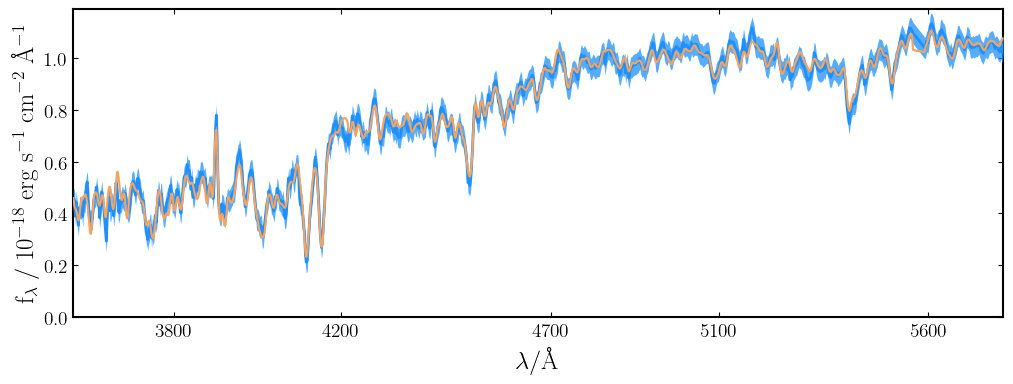

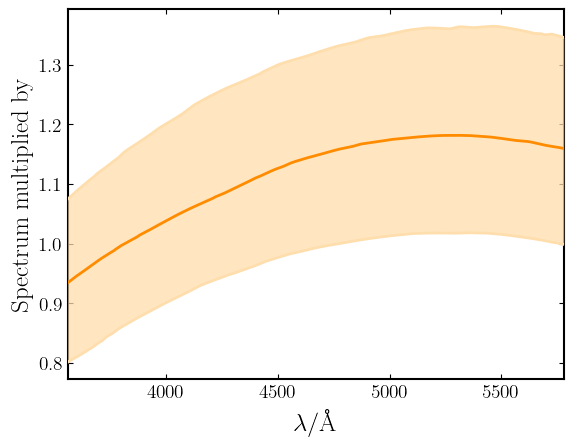

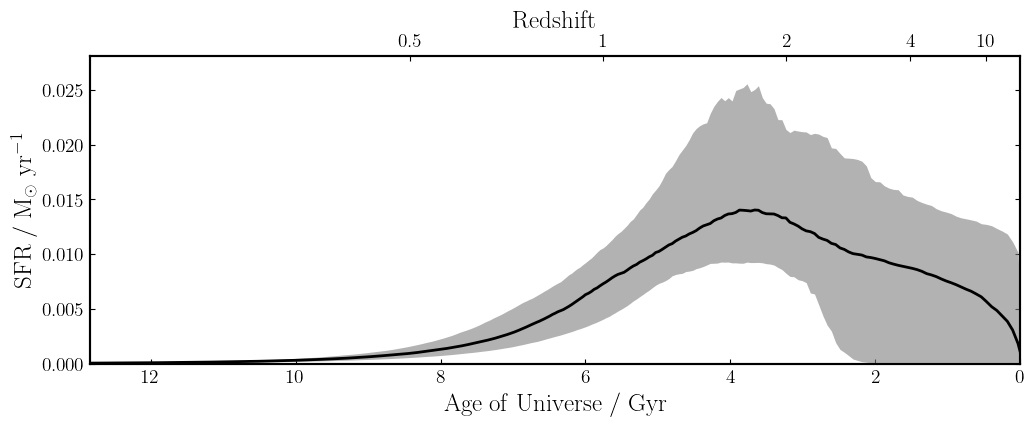

In [17]:
fig = fit.plot_spectrum_posterior(save=False, show=True)
fig = fit.plot_calibration(save=False, show=True)
fig = fit.plot_sfh_posterior(save=False, show=True)
fig = fit.plot_corner(save=True, show=True)

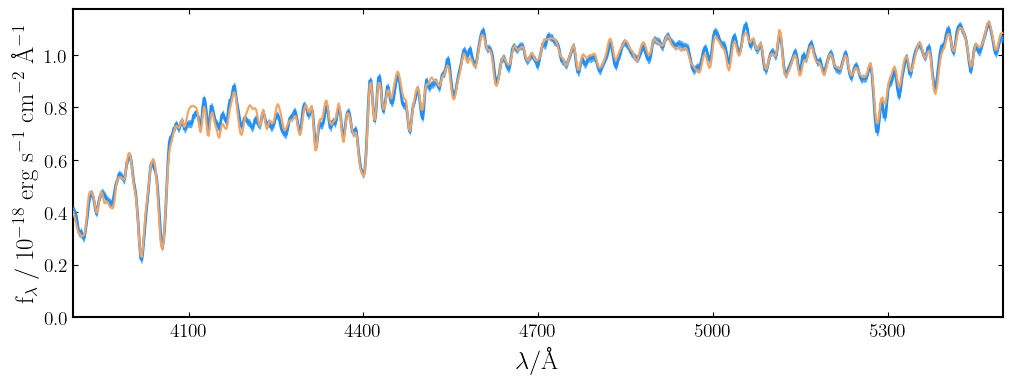

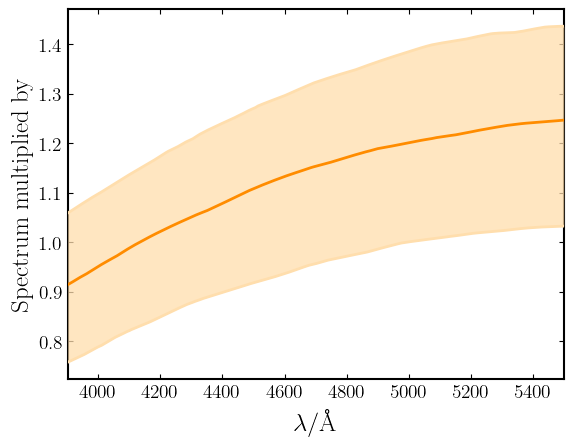

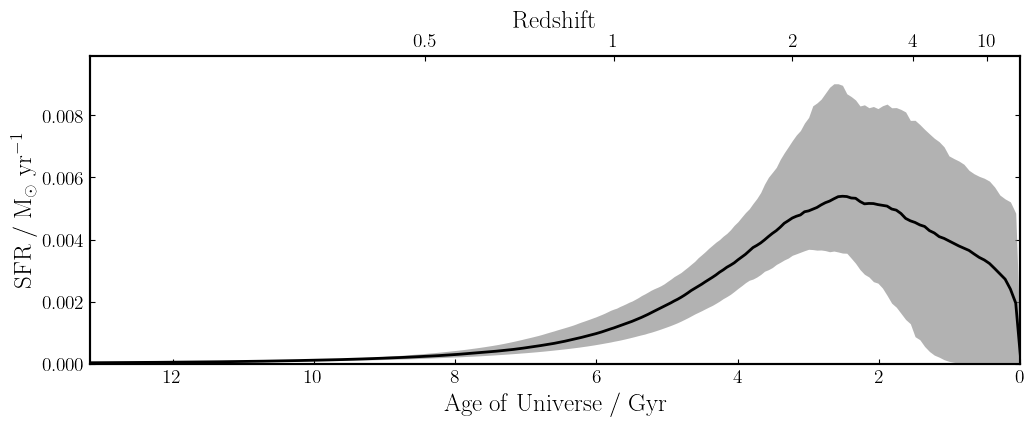

In [24]:
fig = fit.plot_spectrum_posterior(save=False, show=True)
fig = fit.plot_calibration(save=False, show=True)
fig = fit.plot_sfh_posterior(save=False, show=True)
fig = fit.plot_corner(save=True, show=True)

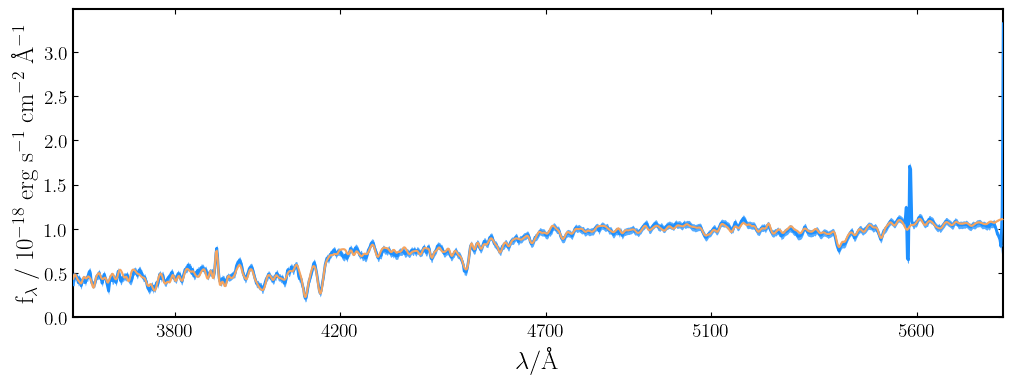

(<Figure size 1200x400 with 1 Axes>,
 [<Axes: xlabel='$\\lambda / \\mathrm{\\AA}$', ylabel='$\\mathrm{f_{\\lambda}}\\ \\mathrm{/\\ 10^{-18}\\ erg\\ s^{-1}\\ cm^{-2}\\ \\AA^{-1}}$'>])

In [18]:
fit.plot_spectrum_posterior(show=True, save=False)

In [19]:
fit.posterior.samples["spectrum"].shape

(500, 1011)

In [20]:
fit.posterior.samples["spectrum"]

array([[4.45378434e-19, 4.77125385e-19, 4.93531652e-19, ...,
        1.39769959e-18, 1.40102710e-18, 1.40063851e-18],
       [4.58001437e-19, 4.91920021e-19, 5.09392342e-19, ...,
        1.43812279e-18, 1.44185017e-18, 1.44159469e-18],
       [3.62645428e-19, 3.88433324e-19, 4.01780641e-19, ...,
        1.07761473e-18, 1.08002913e-18, 1.07961767e-18],
       ...,
       [2.73248323e-19, 2.93450864e-19, 3.03952463e-19, ...,
        9.06236109e-19, 9.08478940e-19, 9.08288614e-19],
       [4.10342192e-19, 4.40204109e-19, 4.54815774e-19, ...,
        1.19084537e-18, 1.19336702e-18, 1.19260006e-18],
       [3.22329457e-19, 3.45792012e-19, 3.57313492e-19, ...,
        9.79388701e-19, 9.81548761e-19, 9.81078144e-19]])